# Star Wars Espisode 2 Data Clean

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json

from utils import parsing

## Cleaning Raw Data



The cleanup script with this format
```
				AMIDALA
			I should not have come back.

				CAPTAIN TYPHO
			M'Lady, you are still in danger.
````


### Episode 2

In [2]:
filename = './data/02_star_wars_raw.txt'

with open(filename, 'r') as raw_file:
    raw_lines_ep2 = raw_file.readlines()

print(f'Lines {len(raw_lines_ep2)}')

Lines 5493


In [3]:


paragraphs_ep2 = parsing.extract_paragraphs(raw_lines_ep2)

for p_num, content in paragraphs_ep2.items():
    print(f'****** {p_num} ({len(content)}) *****')
    print(content['lines'])
    if p_num > 20:
        break
    

****** 1 (1) *****
['EXT. SPACE', 'A vast sea of stars severas as a backdrop for the Main Title, following by a rollup, whcih crawls into infinity.']
****** 2 (1) *****
['There is unrest in the Galactic Senate', 'Several hundred solar systems under', 'the leadership of the rebel leader, Count', 'Dooku, have decalred their intentions to', 'secede from the Republic.']
****** 3 (1) *****
['This separatist movement has made it', 'difficult for the limited number of', 'Jedi Kights to maintain peace and', 'order in the galaxy.']
****** 4 (1) *****
['Senator Amidala, the former Queen of', 'Naboo, is returning to Coruscant', 'to vote on the critical issue', 'of creating an army to assist the', 'overwhelmed Jedi.']
****** 5 (1) *****
['PAN UP to reveal the amber city planet of Coruscant. A yellow Naboo Fighter flies OVER CAMERA toward the planet, followed by a large Royal Cruiser and two more Fighters.']
****** 6 (1) *****
['EXT. CITYSCAPE, CORUSCANT - DAWN', 'The ships skim across the surface 

In [4]:
save_json = True
if save_json:
    filename = './output/02_star_wars.json'
    with open(filename, 'w') as json_file:
        json.dump(paragraphs_ep2, json_file)

In [5]:
character_lines_ep2 = parsing.parse_paragraphs(paragraphs_ep2)
        

In [6]:
df_dict_ep2 = parsing.build_dialogue_dict(character_lines_ep2)

In [7]:
df_ep2 = pd.DataFrame.from_dict(df_dict_ep2)
df_ep2.head()

,Paragraph,Character,Dialogue
0,1,EXT,A vast sea of stars severas as a backdrop for ...
1,2,T,Several hundred solar systems under the leader...
2,3,T,difficult for the limited number of Jedi Kight...
3,4,S,"Naboo, is returning to Coruscant to vote on th..."
4,6,EXT,The ships skim across the surface of the city ...


In [8]:
df_ep2['Character'] = df_ep2['Character'].str.strip()
df_ep2['Character'].unique()

array(['EXT', 'T', 'S', 'CAPTAIN TYPHO', 'PADME', 'CORDE', 'AMIDALA',
       'INT', 'MAS AMEDDA', 'PALPATINE', 'SENATOR ASK', 'A',
       'AMBASSADOR DARSANA', 'ORN FREE', 'MACE WINDU', 'YODA', 'DAR WAC',
       'KI-ADI-MUNDI', 'BAIL ORGANA', 'JAR JAR', 'OBI-WAN', 'ANAKIN',
       'ELAN SLEAZEBAGGANO', 'ELAN', 'ZAM WESSEL', 'ZAM', 'DORME', 'PK-4',
       'SERVER', 'FOOD SERVER', 'HERMIONE', 'HERMIONE BAGWA',
       'DEXTER JETTSTER', 'QUEEN JAMILLIA', 'SIO BIBBLE', 'JOCASTA NU',
       'RYOO', 'SOLA', 'JOBAL', 'RUWEE', 'JOVAL', 'CHILDREN',
       'JEDI CHILD', 'MACE', 'MACE-WINDU', 'TAUN WE', 'LAMA SU',
       'OBI-WAM', 'WINDU', 'PAMDE', 'BOBA FETT', 'JANGO FETT', 'JANGO',
       'BOBA', 'WATTO', 'C-3PO', 'OWEN', 'BERU', 'CLIEGG', 'H', 'SHMI',
       'THREEPIO', 'COUNT DOOKU', 'DOOKU', 'SUN RIT', 'POGGLE',
       'NUTE GUNRAY', 'PLO KOON', 'DROID CAPTAIN', 'CLONE CAPTAIN',
       'DARTH SIDIOUS'], dtype=object)

In [9]:
non_characters = ['EXT', 'T', 'S', 'INT', 'A', 'H']

for character in non_characters:
    condition = (df_ep2['Character'] == character)
    df_ep2.drop(df_ep2[condition].index, inplace=True)


In [10]:
replacements = [('BOBA','BOBA FETT'), ('JANGO', 'JANGO FETT',), ( 'MACE', 'MACE WINDU'),
               ('MACE-WINDU', 'MACE WINDU'), ('WINDU', 'MACE WINDU'), ('THREEPIO', 'C-3PO'),
               ('OBI-WAM', 'OBI-WAN'), ('DOOKU', 'COUNT DOOKU')]
for pair in replacements:
    df_ep2.loc[df_ep2['Character'] == pair[0], 'Character'] = pair[1]

In [11]:
character_list = list(df_ep2['Character'].unique())
character_list.sort()
print(character_list)

['AMBASSADOR DARSANA', 'AMIDALA', 'ANAKIN', 'BAIL ORGANA', 'BERU', 'BOBA FETT', 'C-3PO', 'CAPTAIN TYPHO', 'CHILDREN', 'CLIEGG', 'CLONE CAPTAIN', 'CORDE', 'COUNT DOOKU', 'DAR WAC', 'DARTH SIDIOUS', 'DEXTER JETTSTER', 'DORME', 'DROID CAPTAIN', 'ELAN', 'ELAN SLEAZEBAGGANO', 'FOOD SERVER', 'HERMIONE', 'HERMIONE BAGWA', 'JANGO FETT', 'JAR JAR', 'JEDI CHILD', 'JOBAL', 'JOCASTA NU', 'JOVAL', 'KI-ADI-MUNDI', 'LAMA SU', 'MACE WINDU', 'MAS AMEDDA', 'NUTE GUNRAY', 'OBI-WAN', 'ORN FREE', 'OWEN', 'PADME', 'PALPATINE', 'PAMDE', 'PK-4', 'PLO KOON', 'POGGLE', 'QUEEN JAMILLIA', 'RUWEE', 'RYOO', 'SENATOR ASK', 'SERVER', 'SHMI', 'SIO BIBBLE', 'SOLA', 'SUN RIT', 'TAUN WE', 'WATTO', 'YODA', 'ZAM', 'ZAM WESSEL']


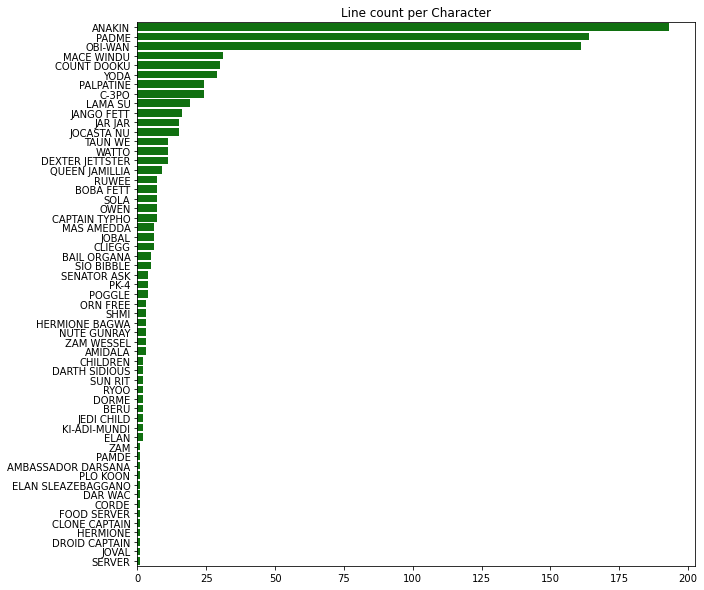

In [12]:
character_series = df_ep2['Character'].value_counts()
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=character_series.values, y=character_series.index, color='green')

ax.set_title('Line count per Character')
plt.show()

In [13]:
character_series.describe()

count     57.000000
mean      15.561404
std       38.308437
min        1.000000
25%        2.000000
50%        4.000000
75%       11.000000
max      193.000000
Name: Character, dtype: float64

In [14]:
filename = './data/episode_02.pkl'
df_ep2.to_pickle(filename)

### Episode 6


In [15]:
filename = './data/06_star_wars_raw.txt'

with open(filename, 'r') as raw_file:
    raw_lines_ep3 = raw_file.readlines()

print(f'Lines {len(raw_lines_ep3)}')

Lines 4668


In [16]:
paragraphs_ep3 = parsing.extract_paragraphs(raw_lines_ep3) 

for p_num, content in paragraphs_ep3.items():
    print(f'****** {p_num} ({len(content)}) *****')
    print(content['lines'])
    if p_num > 20:
        break

****** 1 (1) *****
['RETURN', 'OF THE', 'JEDI']
****** 2 (1) *****
['by', 'Lawrence Kasdan', '&', 'George Lucas']
****** 3 (1) *****
['From The Novel', 'by', 'George Lucas']
****** 4 (1) *****
['Third Draft']
****** 5 (1) *****
['Property of Lucasfilm Ltd.']
****** 6 (1) *****
[]
****** 7 (1) *****
['Completion Date December 1, 1981']
****** 8 (1) *****
['1    SPACE']
****** 9 (1) *****
['The boundless heavens serve as a back-drop for the MAIN TITLE, followed', 'by a ROLL-UP, which crawls into infinity.']
****** 10 (1) *****
['Episode VI', 'RETURN OF THE JEDI']
****** 11 (1) *****
['Luke Skywalker has returned to his home planet of Tatooine in an', 'attempt to rescue his friend Han Solo from the clutches of theEvile', 'gangster Jabba the Hutt. Little does Luke know that the GALACTIC EMPIRE', 'has secretly begun construction on a new armored space station even', 'more powerful than the first dreaded Death Star. When completed, this', 'ultimate weapon will spell certain doom for the smal

In [17]:
if save_json:
    filename = './output/06_star_wars.json'
    with open(filename, 'w') as json_file:
        json.dump(paragraphs_ep3, json_file)

In [18]:
character_lines_ep3 = parsing.parse_paragraphs(paragraphs_ep3)

In [19]:
df_dict_ep3 = parsing.build_dialogue_dict(character_lines_ep3)

if save_json:
    filename = './output/03_star_wars_char.json'
    with open(filename, 'w') as json_file:
        json.dump(df_dict_ep3, json_file)
        
df_ep3 = pd.DataFrame.from_dict(df_dict_ep3)
df_ep3.head()

,Paragraph,Character,Dialogue
0,1,RETURN,OF THE JEDI
1,3,F,by George Lucas
2,9,T,"by a ROLL-UP, which crawls into infinity."
3,10,E,RETURN OF THE JEDI
4,11,L,attempt to rescue his friend Han Solo from the...


In [20]:
df_ep3['Character'] = df_ep3['Character'].str.strip()
df_ep3['Character'].unique()

array(['RETURN', 'F', 'T', 'E', 'L', 'PAN DOWN', 'A', '2',
       'SHUTTLE CAPTAIN', 'DEATH STAR', 'O', 'OFFICER', 'OPERATOR',
       'JERJERROD', 'VADER', 'THREEPIO', 'STRANGE VOICE', 'W', 'BIB', 'B',
       'JABBA', 'LUKE', 'J', 'NINEDENINE', 'OOLA', 'H', 'BOUSHH', 'G',
       'S', 'HAN', 'LEIA', 'I', 'N', 'LANDO', 'C', 'A S', 'EMPEROR', 'V',
       'YODA', 'Y', 'BEN', 'MON MOTHMA', 'ACKBAR', 'GENERAL MADINE',
       'VOICE', 'D', 'CONTROLLER', 'PIETT', 'PILOT VOICE', 'U',
       'THEIR POV', 'SCOUT', 'FAR AHEAD', 'ANOTHER PART', 'R', 'GUARD',
       'COMMANDER', 'LURE', 'P', 'WEDGE', 'GRAY LEADER', 'GREEN LEADER',
       'RED LEADER', 'A M', 'REBEL PILOT', 'STORMTROOPER',
       'BUNKER COMMANDER', '101', 'RED TWO', 'RED THREE', 'NAVIGATOR',
       'Y-WING PILOT', 'WALKER PILOT', 'PILOT', 'CONTROL ROOM',
       'SECOND COMMANDER', 'ANAKIN'], dtype=object)

In [21]:
non_characters = ['RETURN', 'F', 'T', 'E', 'L', 'PAN DOWN', 'A', '2',
                 'O',  'W', 'B', 'J', 'H', 'G','S',  'I', 'N', 'C', 'Y',  'D',
                  'U', 'FAR AHEAD',  'R', 'GUARD', 'P', 'V',]

for character in non_characters:
    condition = (df_ep3['Character'] == character)
    df_ep3.drop(df_ep3[condition].index, inplace=True)

In [22]:
character_list = list(df_ep3['Character'].unique())
character_list.sort()
print(character_list)

['101', 'A M', 'A S', 'ACKBAR', 'ANAKIN', 'ANOTHER PART', 'BEN', 'BIB', 'BOUSHH', 'BUNKER COMMANDER', 'COMMANDER', 'CONTROL ROOM', 'CONTROLLER', 'DEATH STAR', 'EMPEROR', 'GENERAL MADINE', 'GRAY LEADER', 'GREEN LEADER', 'HAN', 'JABBA', 'JERJERROD', 'LANDO', 'LEIA', 'LUKE', 'LURE', 'MON MOTHMA', 'NAVIGATOR', 'NINEDENINE', 'OFFICER', 'OOLA', 'OPERATOR', 'PIETT', 'PILOT', 'PILOT VOICE', 'REBEL PILOT', 'RED LEADER', 'RED THREE', 'RED TWO', 'SCOUT', 'SECOND COMMANDER', 'SHUTTLE CAPTAIN', 'STORMTROOPER', 'STRANGE VOICE', 'THEIR POV', 'THREEPIO', 'VADER', 'VOICE', 'WALKER PILOT', 'WEDGE', 'Y-WING PILOT', 'YODA']


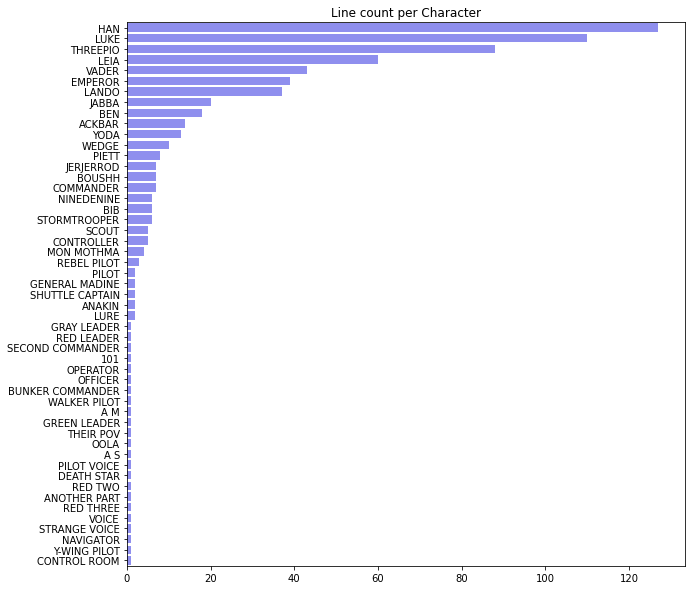

In [23]:
character_series_ep3 = df_ep3['Character'].value_counts()
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=character_series_ep3.values, y=character_series_ep3.index, 
                 color='blue', alpha=0.5)

ax.set_title('Line count per Character')
plt.show()

In [24]:
filename = './data/episode_06.pkl'
df_ep3.to_pickle(filename)